<a href="https://colab.research.google.com/github/sttassya/KuznetsovaN_11005/blob/master/%D0%B4%D0%BB%D1%8F_%D0%B4%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from google.colab import drive
import requests

In [ ]:
data = []

In [ ]:
for i in range(1, 5):
    file_path = f'project_with_commits_{i}.json'
    with open(file_path, 'r') as file:
        data.extend(json.load(file))

with open('combined.json', 'w') as file:
    json.dump(data, file)





In [ ]:
with open('combined.json', 'r') as file:
    data = json.load(file)



In [ ]:
df = pd.DataFrame(data)

print(df)

      id                                        description  \
0    501                                                      
1    510                                                      
2    491                                                      
3    508                                                      
4    497                                                      
..   ...                                                ...   
370   14                                                      
371   10                  Репозиторий для системы Metrikano   
372    5                                                      
373    2  Clone from GitHub: https://github.com/agalimul...   
374    1                                                      

                      name                                name_with_namespace  \
0                  Scaboom                             Maxim Gunbin / Scaboom   
1           Scaboom.Client                      Maxim Gunbin / Scaboom.Client   


In [ ]:
columns_to_keep = ['id', 'name', 'created_at', 'star_count','forks_count','last_activity_at','visibility','statistics', 'description']

In [ ]:
df = df.drop(columns=df.columns.difference(columns_to_keep), axis=1)

In [ ]:
print(df)

      id                                        description  \
0    501                                                      
1    510                                                      
2    491                                                      
3    508                                                      
4    497                                                      
..   ...                                                ...   
370   14                                                      
371   10                  Репозиторий для системы Metrikano   
372    5                                                      
373    2  Clone from GitHub: https://github.com/agalimul...   
374    1                                                      

                      name                created_at  star_count  forks_count  \
0                  Scaboom  2022-06-22T03:37:52.080Z           0            0   
1           Scaboom.Client  2022-06-29T05:06:43.195Z           0            0   


In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])

df['year_created'] = df['created_at'].dt.year

projects_per_year = df['year_created'].value_counts().sort_index()



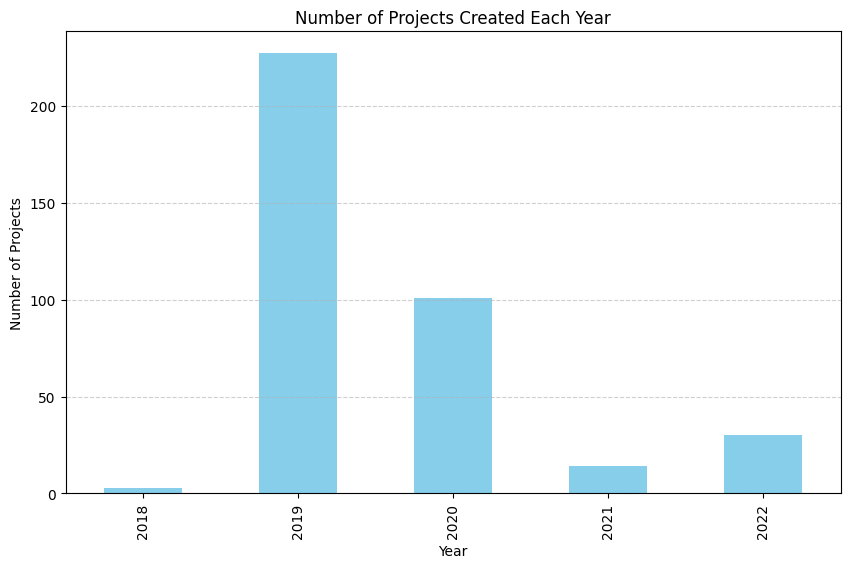

In [ ]:
plt.figure(figsize=(10, 6))
projects_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Projects Created Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
for year, count in projects_per_year.items():
    print(f"Year {year}: {count} projects")

Year 2018: 3 projects
Year 2019: 227 projects
Year 2020: 101 projects
Year 2021: 14 projects
Year 2022: 30 projects


**2018**

In [ ]:
df_2018 = df[df['created_at'].dt.year == 2018]

df_2018['month_created'] = df_2018['created_at'].dt.month

<ipython-input-13-31ff91e3f4d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['month_created'] = df_2018['created_at'].dt.month


<ipython-input-14-547febe2b121>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['month_created'] = df_2018['created_at'].dt.month


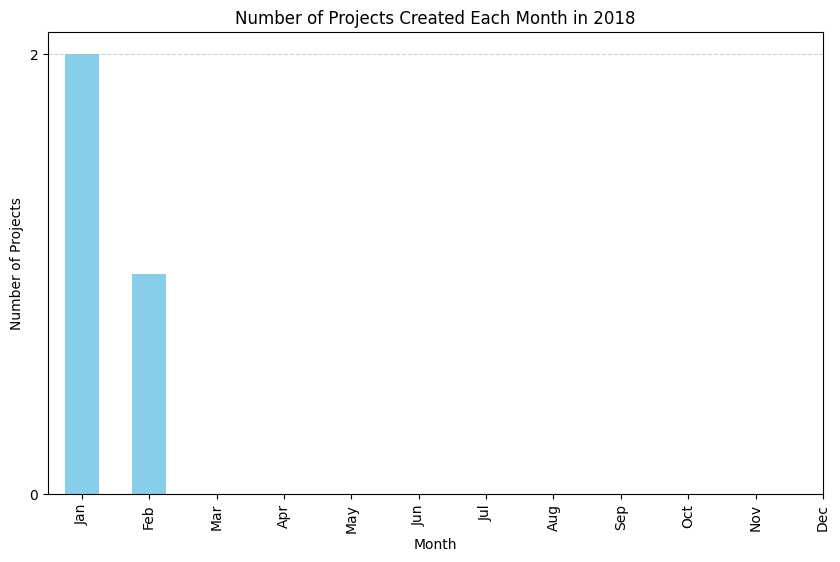

In [ ]:
df_2018['month_created'] = df_2018['created_at'].dt.month

projects_per_month = df_2018['month_created'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
projects_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Projects Created Each Month in 2018')
plt.xlabel('Month')
plt.ylabel('Number of Projects')
plt.yticks(range(0, max(projects_per_month)+1, 2))
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**2019**

In [ ]:
df_2019 = df[df['created_at'].dt.year == 2019]

df_2019['month_created'] = df_2019['created_at'].dt.month

projects_per_month = df_2019['month_created'].value_counts().sort_index()


<ipython-input-15-697874a865a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['month_created'] = df_2019['created_at'].dt.month


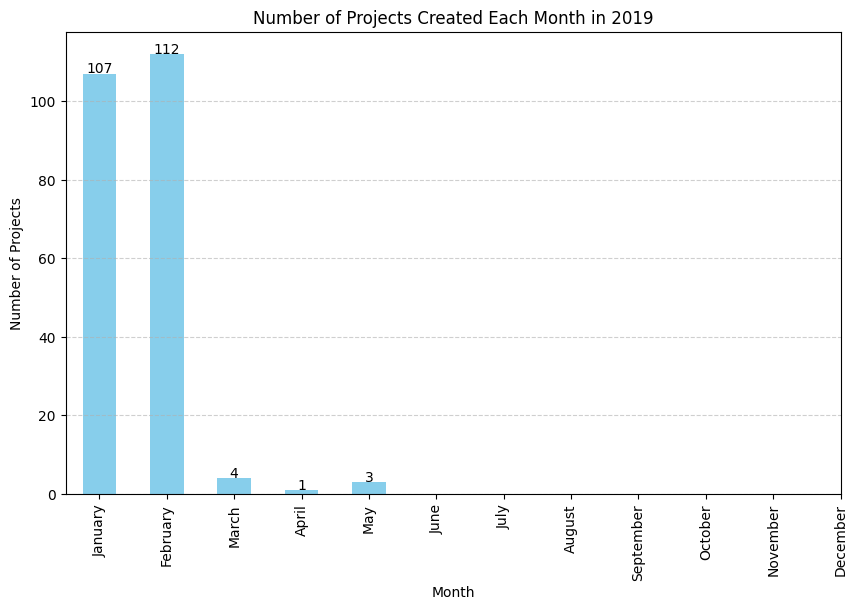

In [ ]:
plt.figure(figsize=(10, 6))
bar_plot = projects_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Projects Created Each Month in 2019')
plt.xlabel('Month')
plt.ylabel('Number of Projects')

for i, v in enumerate(projects_per_month):
    plt.text(i, v + 0.2, str(v), ha='center')

plt.xticks(range(0, 12), [calendar.month_name[i] for i in range(1, 13)])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**2020**

<ipython-input-17-350da5844c92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['month_created'] = df_2020['created_at'].dt.month


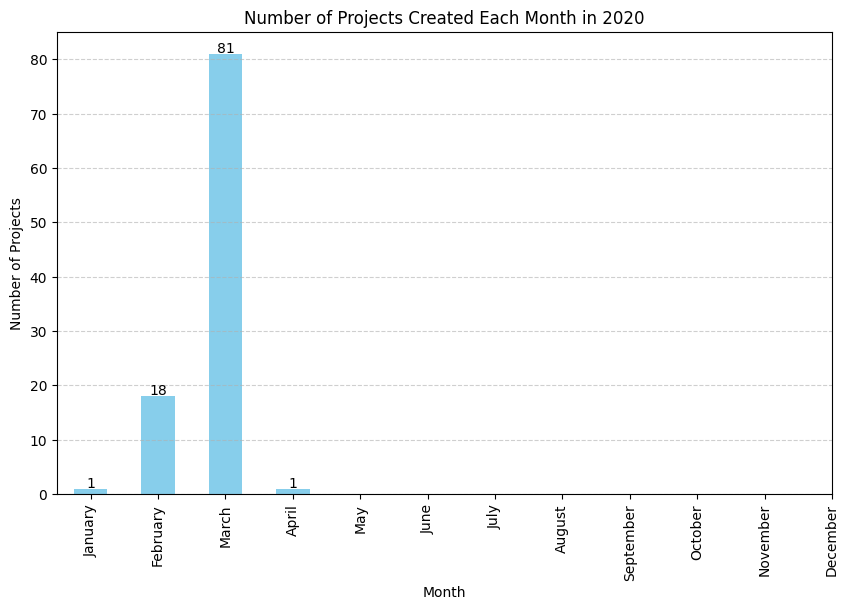

In [ ]:
df_2020 = df[df['created_at'].dt.year == 2020]

df_2020['month_created'] = df_2020['created_at'].dt.month

projects_per_month = df_2020['month_created'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bar_plot = projects_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Projects Created Each Month in 2020')
plt.xlabel('Month')
plt.ylabel('Number of Projects')

for i, v in enumerate(projects_per_month):
    plt.text(i, v + 0.2, str(v), ha='center')

plt.xticks(range(0, 12), [calendar.month_name[i] for i in range(1, 13)])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


коммиты

In [ ]:
projects = {}

for project in data:

    project_data = {
        'name': project['name'],
        'commits': project['statistics']['commit_count']
    }

    projects[project_data['name']] = project_data['commits']


sorted_projects = sorted(projects.items(), key=lambda x: x[1], reverse=True)

for project, commits in sorted_projects:
    print(f'{project}: {commits}')

taiga-front: 5302
taiga-back: 3542
scientometric-indicators: 1342
neomodel: 1118
graphql-core: 862
graphene-neo4j: 671
AnimationUnity: 637
VASILYEV_VKR_LIRS: 275
master-thesis: 256
distribution: 219
core: 171
robot-lawyer: 161
profile-frontend: 126
visportraits_server: 109
microsimulator-gazebo: 107
FullTextSearch: 91
visportraits_plugin: 88
Unity3DAutoTestFramework: 83
sentiment-nn: 77
thesis: 64
Defectoscoper: 62
ARSDK: 62
arsdk: 57
Join: 57
Scaboom: 56
ansible-configs: 56
study_insight: 50
big-data-lms-back-end: 49
diploma-backend: 43
visportraits_framework: 43
engineer-remote-control-gui: 39
passmanager: 37
big-data-lms-front-end: 33
edu-text-checker-practise: 32
EasyXML: 31
HistoryQuiz: 31
rpd-analyzer: 27
duplicate_finder: 26
Zalyalutdinov-2019: 25
text-analyzer-tool: 23
micromock: 22
CloadRestAPIServicesGeneration: 21
EmoVideo-thesis: 20
user-service: 20
metrics-identification-platform: 19
kpfu-ovpn-gateway: 19
iarma: 17
FlexCodeGeneration: 17
BookCatalogue: 17
diplomProject: 14

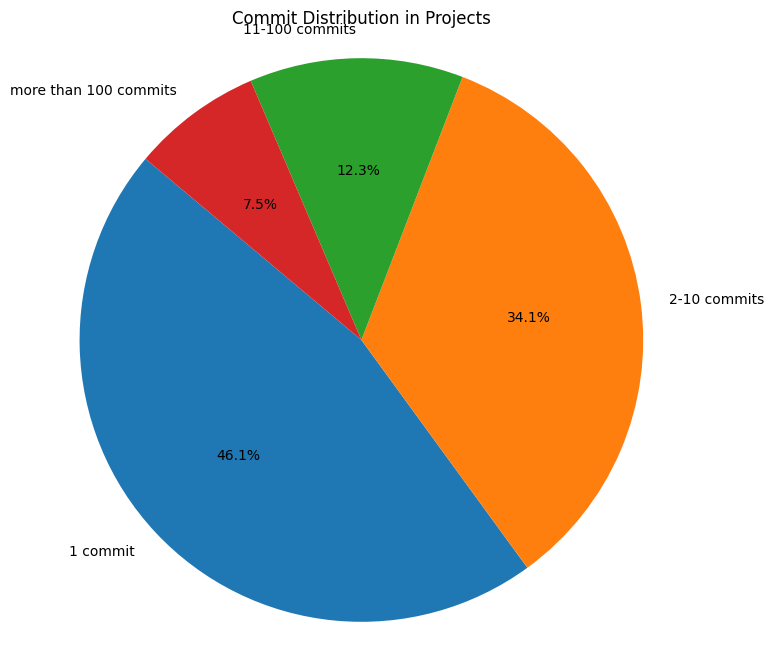

In [ ]:
commit_ranges = {
    '1 commit': 0,
    '2-10 commits': 0,
    '11-100 commits': 0,
    'more than 100 commits': 0
}

for project in data:
    commit_count = project['statistics']['commit_count']
    if commit_count == 1:
        commit_ranges['1 commit'] += 1
    elif 2 <= commit_count <= 10:
        commit_ranges['2-10 commits'] += 1
    elif 11 <= commit_count <= 100:
        commit_ranges['11-100 commits'] += 1
    else:
        commit_ranges['more than 100 commits'] += 1

plt.figure(figsize=(8, 8))
plt.pie(commit_ranges.values(), labels=commit_ranges.keys(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Commit Distribution in Projects')
plt.show()

**По имени**

In [ ]:
for project in data:
    print(project.get('name', 'No Name'))

Scaboom
Scaboom.Client
voice_assistant
voice_assistant_front
offigator
data-pipeline-vkr2022
thesis_project_2022
dtc-server
dtc-runner
dtc-front
dtc-core
Diploma
Text2SceneGenerator
recycling-app
ui-converter
city-modelling
VKR
MLOpsPipeline
cloud-office
continuous_data_quality_vkr
diplomProject
VKR_Kuzmin_11-803
VKR_Arsembekova_11-803
neural-world-generator
TMA
vault-generator
flutter-starter-plugin
iarma
DoiRegistrar
method_of_group_accounting_of_arguments
VKR_AYUArsenyuk
VKR_KVKolyshkin
VKR_PSNovoselov
VKR_RMMusin
AR-Barcode-Scanner
diplomnaya_rabota
VKR_KSChernysheva
VKR_ARKhamedzhanov
VKR_VABezrukov
VKR_VVPetrov
VKR_ASHusnutdinov
VKR_TMBadretdinov
VKR_GuISharafutdinova
VKR_AdRGarifullina
vkr_the_supplier
Autoencoder
Chebotareva_VKR_LIRS
Scenario-Editor-2020
lambda
robustness
DetectionObject
Hand_in_VR
study_insight
code-quality-analyzers
Diploma
student-assistant
Demo_project
Demo
diploma-backend
diplom
diploma-eclipse-plugin
Named Entity Recognition
diploma-intellij-idea-plugin
g

**звездочки**

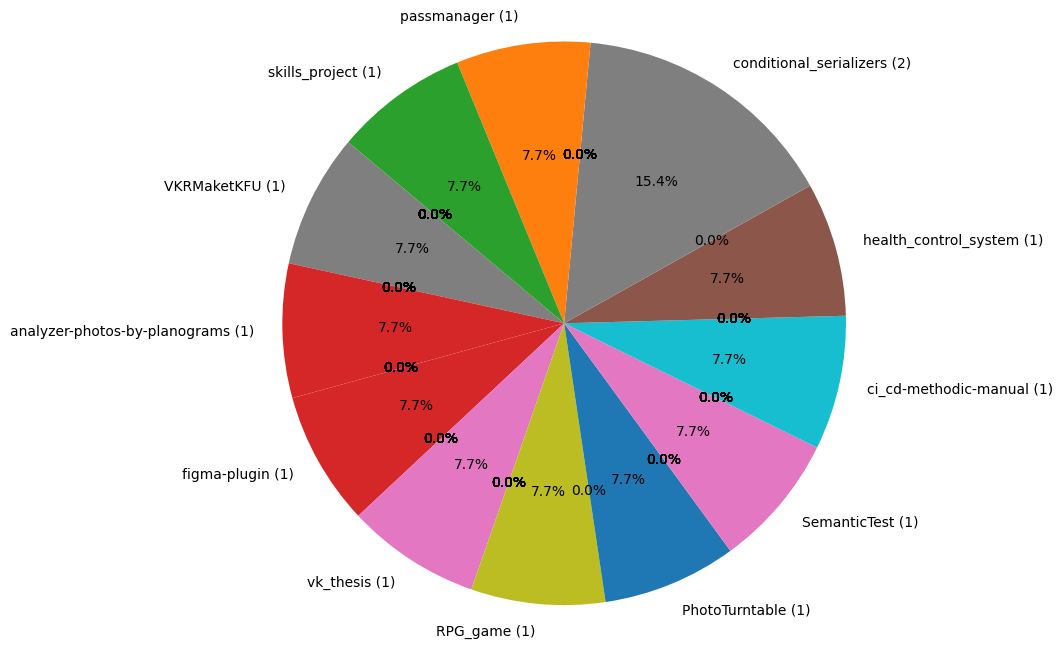

In [ ]:
repositories = [repo['name'] for repo in data]
stars = [repo['star_count'] for repo in data]

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(stars, labels=[f'{repo} ({star})' if star != 0 else '' for repo, star in zip(repositories, stars)], autopct='%1.1f%%', startangle=140)
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(10)
plt.axis('equal')

plt.show()

In [ ]:
for project in data:
    if project.get('forks_count', 0) >= 1:
        print(project.get('name', 'fork_count'))

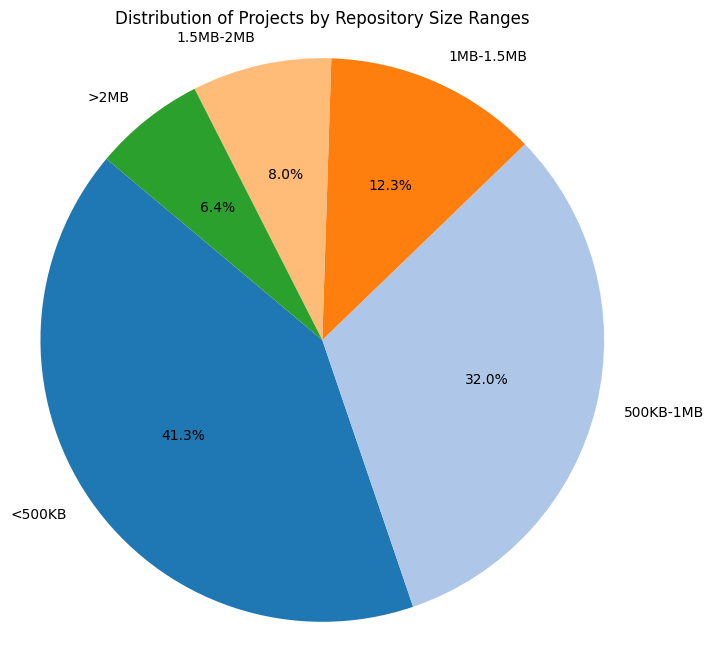

In [ ]:
df['repository_size'] = df['statistics'].apply(lambda x: x['repository_size'])

size_bins = [0, 500000, 1000000, 1500000, 2000000, float('inf')]
size_labels = ['<500KB', '500KB-1MB', '1MB-1.5MB', '1.5MB-2MB', '>2MB']

df['repository_size_range'] = pd.cut(df['repository_size'], bins=size_bins, labels=size_labels, right=False)

size_counts = df['repository_size_range'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(size_counts, labels=size_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Projects by Repository Size Ranges')
plt.axis('equal')
plt.show()

**Проекты, у которых количество коммитов > 100. Наиболее "интересные" проекты**

In [ ]:
projects = data

for project in projects:
    commit_count = project['statistics']['commit_count']
    project_name = project['name']
    project_id = project['id']
    repository_size = project['statistics']['repository_size']
    if commit_count > 100:
        print(project_id, project_name)




421 visportraits_server
330 core
344 profile-frontend
366 microsimulator-gazebo
203 master-thesis
254 VASILYEV_VKR_LIRS
172 scientometric-indicators
231 AnimationUnity
98 robot-lawyer
184 graphql-core
183 graphene-neo4j
15 neomodel
166 distribution
2 taiga-back
1 taiga-front


In [ ]:
with open('web_urls.txt', 'w') as f:
    for project in data:
        f.write(project['web_url'] + '\n')

In [ ]:
len(df)


375

In [ ]:
df_1 = df[df['description'].str.len() > 1]
percentage_of_non_empty_descr = len(df_1) / len(df) * 100
percentage_of_empty_descr = (len(df) - len(df_1)) / len(df) * 100
print(f"Количество проектов с описанием в процентах : {percentage_of_non_empty_descr:.2f}%")
print(f"Количество проектов без описанием в процентах : {percentage_of_empty_descr:.2f}%")

Количество проектов с описанием в процентах : 28.27%
Количество проектов без описанием в процентах : 71.73%


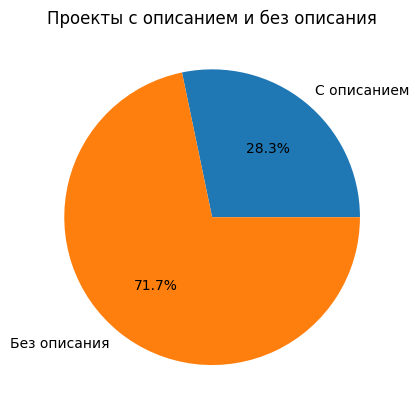

In [ ]:
plt.pie([percentage_of_non_empty_descr, percentage_of_empty_descr],
        labels=['С описанием', 'Без описания'],
        autopct='%1.1f%%')

plt.title('Проекты с описанием и без описания')
plt.show()